In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
import warnings
warnings.simplefilter("ignore")

---
### 합계 출산율 데이터 로드

In [7]:
df = pd.read_excel("../../data/dataset/출생아수_합계출산율.xls", skiprows=2, skipfooter=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [8]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [9]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [11]:
df.rename(index={'출생아\xa0수' : '출생아 수', '합계\xa0출산율' : '합계 출산율'}, inplace=True)

In [13]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [14]:
df = df.T # 행렬 바꾸기 ( T : transpose 약자 - transpose() 로도 사용 가능 )
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


### 차트 그리기

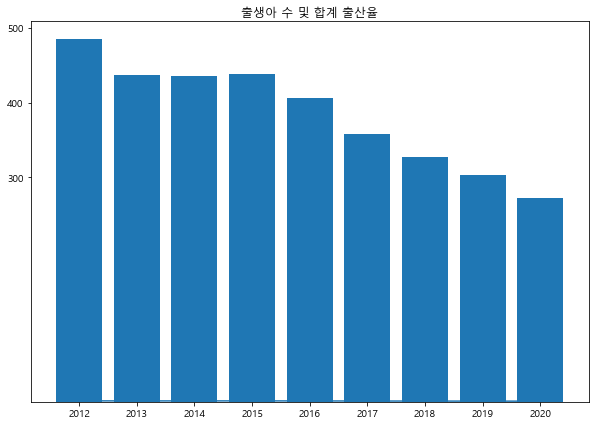

In [17]:
plt.figure(figsize=(10, 7))
plt.title('출생아 수 및 합계 출산율')
plt.yticks(range(300, 700, 100))
plt.bar(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

#### 우측 보조축 설정

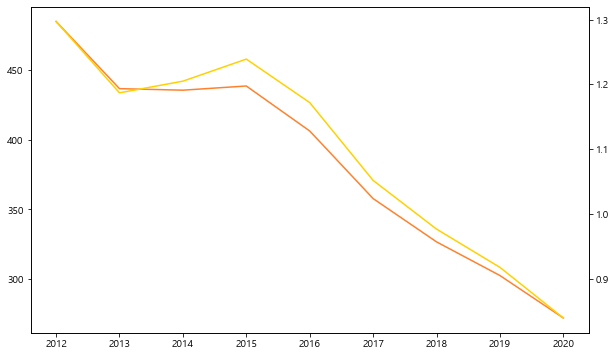

In [23]:
fig, axes = plt.subplots(figsize=(10,6))
axes.plot(df.index, df['출생아 수'], color='#ff812d')

# x 축 공유
axes2 = axes.twinx()
axes2.plot(df.index, df['합계 출산율'], color='#ffd100')
plt.show()

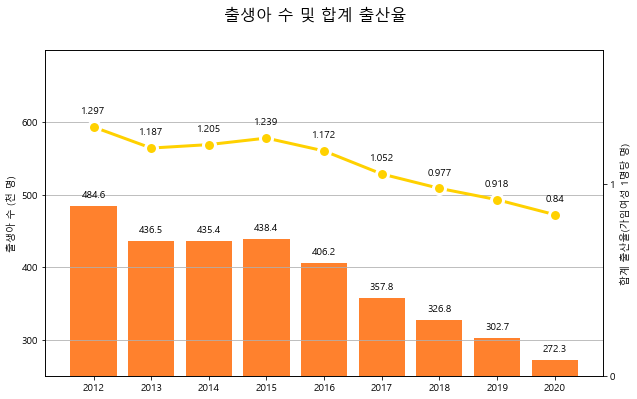

In [57]:
fig, axes = plt.subplots(figsize=(10,6))
axes.bar(df.index, df['출생아 수'], color='#ff812d')
axes.set_ylim(250, 700)
axes.set_yticks(range(300,700,100))
axes.set_ylabel('출생아 수 (천 명)')
for idx, txt in enumerate(df['출생아 수']):
    axes.text(idx, txt + 12, txt, ha='center')

axes.grid(axis='y')

axes2 = axes.twinx()
axes2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=12, lw=3, mew=3 ,mec='w')
axes2.set_ylim(0, 1.7)
axes2.set_yticks([0, 1])
axes2.set_ylabel('합계 출산율(가임여성 1명당 명)')

for idx, txt in enumerate(df['합계 출산율']):
    axes2.text(idx, txt + 0.07, txt, ha='center')

fig.suptitle('출생아 수 및 합계 출산율', fontsize='16')
    
plt.show()